# Homework 3 - 95-791 Data Mining (Fall 2021) 
## Name: Xi Yan
#### Due: Sunday, December 5th, 2021


### Changing the author field and file name.

 (a) Change the `name:` field on the Rmd document from Your Name Here to your own name.

 (b) Rename this file to "Homework3_F21_YourHameHere.ipynb", where YourNameHere is changed to your own name.


### Installing and loading packages

Before you begin this Lab make sure you have installed all the required libraries. Load the libraries as indicated below.

You only need to install libraries once.  Once they're installed, you may use them by **importing** the libraries using the `import` command.  For today's lab, you'll want to run the following code


In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn import tree
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from yellowbrick.datasets import load_nfl
#from apyori import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from yellowbrick.datasets import load_nfl
from sklearn.datasets import fetch_california_housing
%matplotlib inline
plt.style.use('seaborn-white')



---

### Question 1 - RandomForests [ 22 pts]


**1)a) Read the `heart_failure_clinical_records_dataset`, convert any categorical variable to numerical and print the first 5 rows of the dataset.** [1 pts]

In [41]:
#your code here
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df['sex'] = df['sex'].astype('category').cat.codes
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,0,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,0,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,0,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,0,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,1,0,8,1


**1)b) Divide intro training and testing datasets, with a 20-80 ratio. Print out your y_test dataset.** [1 pts]

In [42]:
#your code here
X = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
feature_names = X.columns
print(y_test)

230    1
111    0
146    0
212    0
84     1
250    0
129    0
18     1
232    0
24     1
223    0
6      1
13     1
64     0
211    0
202    0
298    0
101    0
33     0
46     1
191    0
68     1
206    0
291    0
14     0
214    0
175    0
71     0
178    0
233    0
294    0
152    0
130    0
43     0
106    0
144    1
91     0
215    0
225    0
45     1
186    1
295    0
173    0
277    0
103    0
229    0
70     0
235    0
1      1
113    1
221    0
12     1
241    0
61     1
267    0
244    0
154    0
11     1
63     1
39     1
Name: DEATH_EVENT, dtype: int64


**1)c)Build a DecisionTreeClassifier with your datasets. Plot the generated tree. How good are your classification results?** [2 pts]

**Note: you may use any function we learned in Lab 3 to plot your DecisionTreeClassifier

In [43]:
#your code here
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.67      0.67      0.67        18

    accuracy                           0.80        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.80      0.80      0.80        60



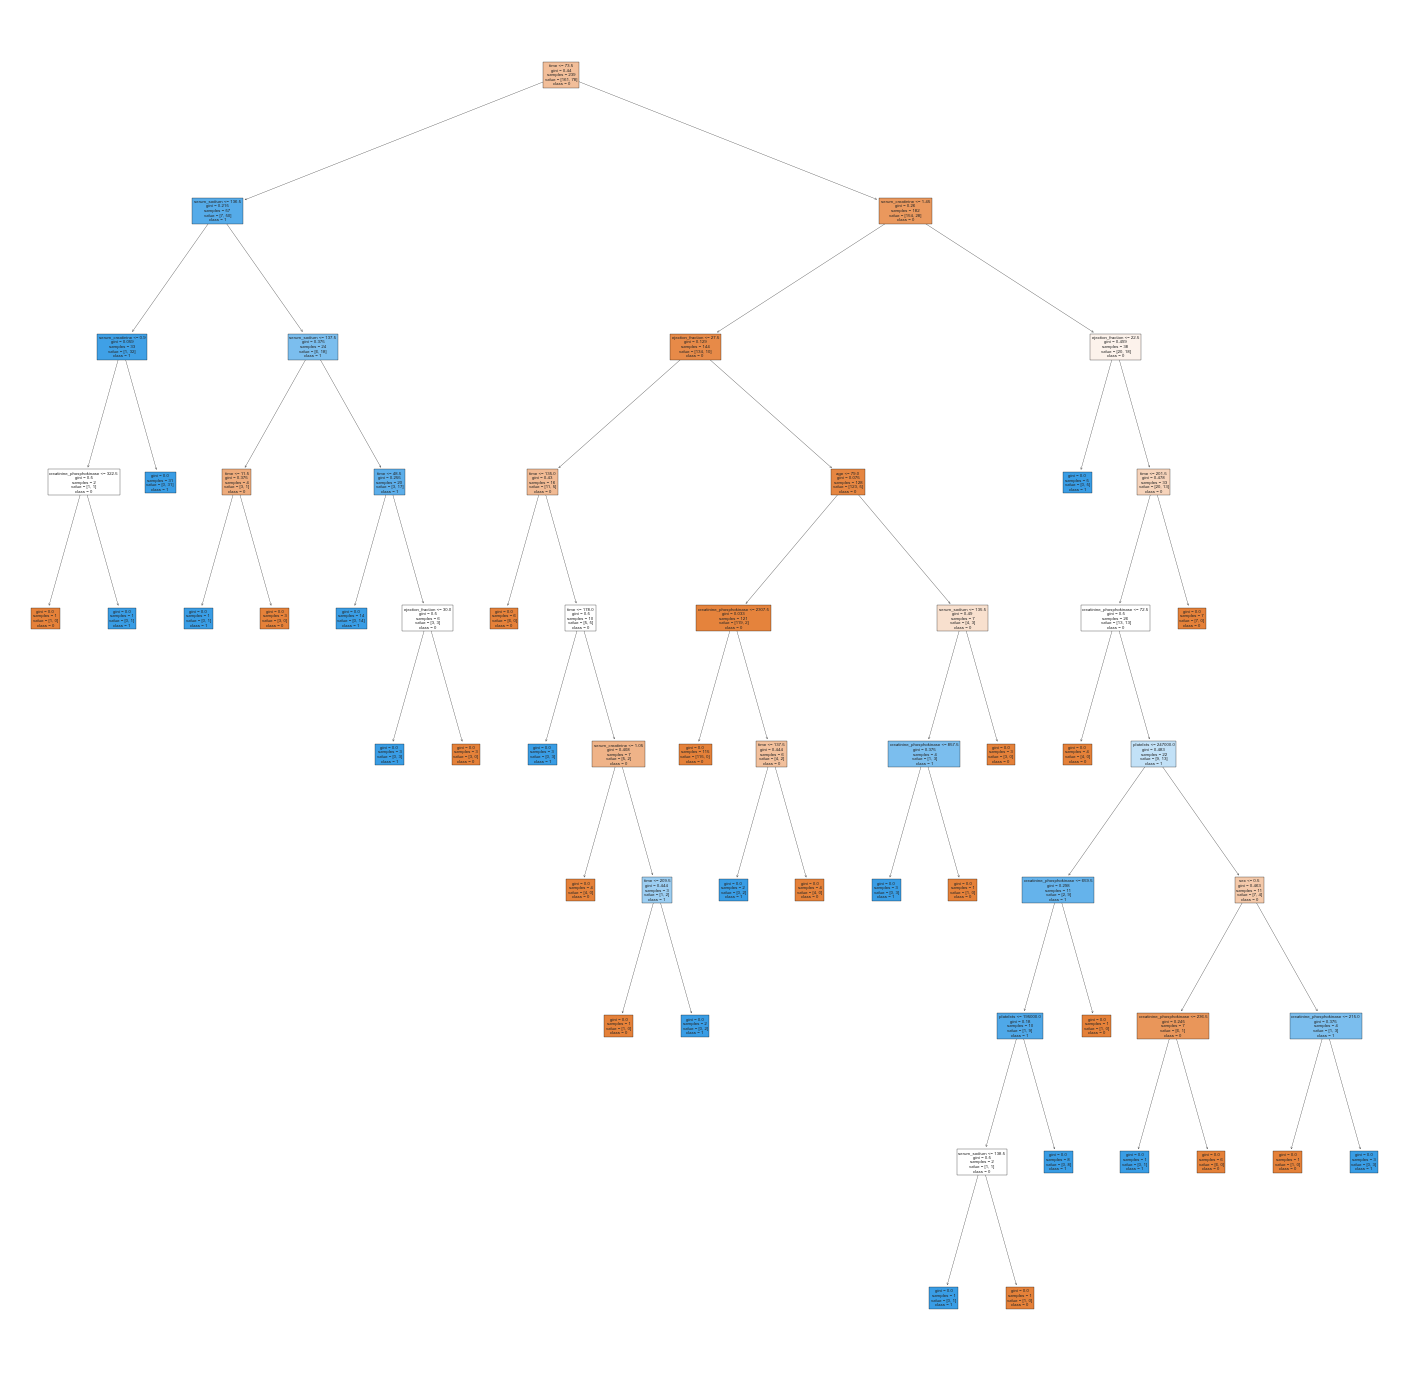

In [44]:
fig = plt.figure(figsize=(25, 25))
plot_tree = tree.plot_tree(clf,
                           feature_names=feature_names,
                           class_names=['0', '1'],
                           filled=True)


--> Your Answer Here

The result is relatively not good, I would say, since it only has 75% percent of accracy overall. The prediction on DEATH_EVENT = 0 is 83%, which is more precise than the prediction on DEATH_EVENT = 1, which is 58%.

**1)d) Repeat the process the process from 1)c) but this time using a RandomForestClassifier. How good are your results?** [4 pts]

In [45]:
#your code here
rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91        42
           1       0.81      0.72      0.76        18

    accuracy                           0.87        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.86      0.87      0.86        60



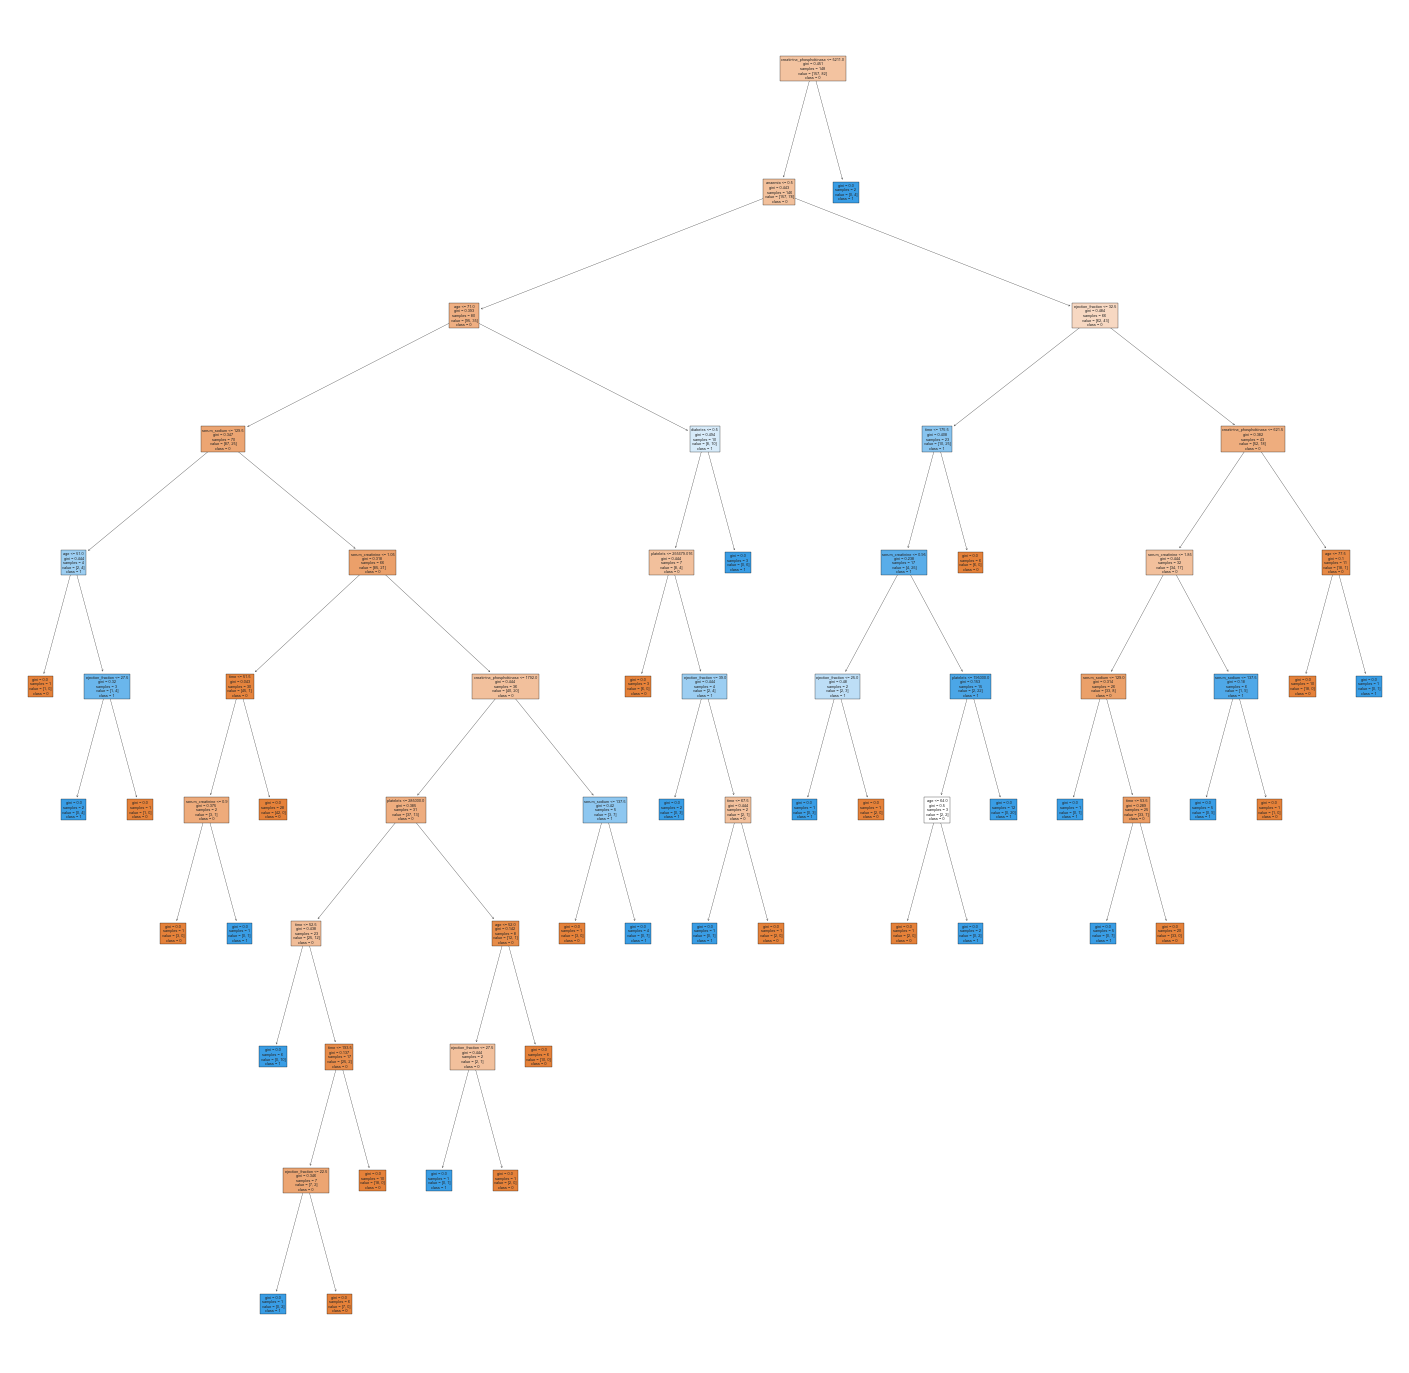

In [53]:
fig = plt.figure(figsize=(25, 25))
plot_single_random_forest = tree.plot_tree(rf[50],
                           feature_names=feature_names,
                           class_names=['0', '1'],
                           filled = True)

--> Your Answer Here

The result from RandomForest is better than decision tree classification. The overall accuracy is 87%, with both higher precision on predicting DEATH_EVENT = 0 and 1, which are 89% and 81%. This is a significant improvement for DEATH_EVENT = 1.

**1)e) Repeat the process the process from 1)d) but this time tune the number of trees (n_estimators) in your RF. You can use CV to tune your RF. Plot your number of trees against your CV score. What is your best number of trees?** [6 pts]
**Hint: try a minimum of 20 trees, all the way to 500 trees.

In [111]:
#your code here
num_tree = []
cv_score = []

for i in range(20, 520, 20):
    rf = RandomForestClassifier(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_test)
    cv = abs(np.mean(cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')))
    cv_score.append(cv)
    num_tree.append(i)


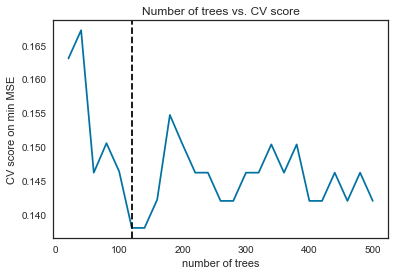

120


In [115]:
plt.plot(num_tree, cv_score)
plt.axvline(num_tree[cv_score.index(min(cv_score))], linestyle='--', color='black')
plt.xlabel("number of trees")
plt.ylabel("CV score on min MSE")
plt.title("Number of trees vs. CV score")
plt.show()
print(num_tree[cv_score.index(min(cv_score))])

In [116]:
rf = RandomForestClassifier(n_estimators=120, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.80      0.67      0.73        18

    accuracy                           0.85        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60



--> Your Answer Here

Tried 25 total number of times. The best number of trees with the highest CV score on accuracy is 120.

**1)f) Random Forest have a few parameters we can tune. We could tune each one separately through CV, or we could use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to try all our parameters at one. This is called hyperparameter tuning. Read the documentation to run GridSearchCV on at least 3 different parameter from your RandomForest. Once you've obtained the best parameters, re-train your RandomForest with them and report your results. Did this results improve compared to 1)e)?** [6 pts]

In [118]:
#your code here
#Create the parameters list you wish to tune
parameters = {'n_estimators':range(20, 520, 20)}

#Initialize the classifier
rf = RandomForestClassifier(random_state=1)

#Perform grid search on the classifier using the accuracy as the scoring method
clf = GridSearchCV(rf, param_grid=parameters, scoring='accuracy', cv=10)

#Fit the grid search object to the training data and find the optimal parameters
clf.fit(X_train,y_train)

# print the best n_estimators
print(clf.best_params_)

#Perform grid search on the classifier using the negative MSE as the scoring method
clf = GridSearchCV(rf, param_grid=parameters, scoring='neg_mean_squared_error', cv=10)

#Fit the grid search object to the training data and find the optimal parameters
clf.fit(X_train,y_train)

# print the best n_estimators
print(clf.best_params_)

{'n_estimators': 120}
{'n_estimators': 120}


In [120]:
rf = RandomForestClassifier(n_estimators=120, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.80      0.67      0.73        18

    accuracy                           0.85        60
   macro avg       0.83      0.80      0.81        60
weighted avg       0.85      0.85      0.85        60



--> Your Answer Here

Using the GridSearchCV of both scoring method of accuracy and negative MSE, the best n_estimators are identical to what 1)e), which is 120, since the performance of the result of the RandomForest of n_estimators=120 is identical to 1)e).

**1)g) For 1)f) plot the variable importance. What is your most important variable? Describe the differences between variables.** [2 pts]

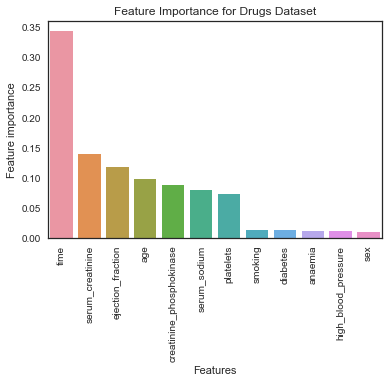

In [124]:
#your code here
forest_importances = pd.DataFrame({ 'features': feature_names, 'importances': rf.feature_importances_ })
sns.barplot(x="features",y="importances" ,data=forest_importances,
            order=forest_importances.sort_values('importances',ascending = False).features)
plt.xticks(rotation=90)
plt.title("Feature Importance for Drugs Dataset")
plt.ylabel("Feature importance")
plt.xlabel("Features")
fig.tight_layout()

--> Your Answer Here

As shown above, the most important variable is time, this variable has over twice of the importance than other features. Variables of serim_creatinine, ejection_fraction, age, creatinine_phosphaokinase, serum_sodium, and platelets have similar variable importance with the value range from 0.10 to 0.15. The least important variables are smoking, diabetes, anaemia, high_blood_pressure, and sex, which all have feature importance lower than 0.05.

---


### Question 2 - Unsupervised Learning - Clustering [ 16 pts]



**2)a) For this question we will work with the NFL dataset from [yellowbrick](https://www.scikit-yb.org/en/latest/api/datasets/nfl.html). Load the dataset, split it into X and y. We will only need X for this question. Print out X and print out the information for the dataset to make sure there are no categorical variables.** [ 2 pts]


In [140]:
#your code here
X = load_nfl()[0]
y = load_nfl()[1]
print(X)

     Age   G  GS  Tgt  Rec  Ctch_Rate   Yds   Y/R  TD  Lng  ...  Fmb  C_pos  \
0     25  16  16  147  125      0.850  1405  11.2   9   72  ...    2      0   
1     28  16  16  156  116      0.744  1163  10.0   8   34  ...    1      0   
2     26  16  16  163  115      0.706  1572  13.7  11   49  ...    2      0   
3     29  16  16  170  113      0.665  1677  14.8   8   58  ...    2      0   
4     28  16  16  153  113      0.739  1373  12.2   9   68  ...    1      0   
..   ...  ..  ..  ...  ...        ...   ...   ...  ..  ...  ...  ...    ...   
489   24   3   0    1    1      1.000    14  14.0   0   14  ...    1      0   
490   24   3   0    1    1      1.000     1   1.0   0    1  ...    0      0   
491   35  16  16    1    1      1.000     9   9.0   0    9  ...    0      0   
492   30  16  16    1    1      1.000   -11 -11.0   0  -11  ...   10      0   
493   25  16   0    2    1      0.500    23  23.0   0   23  ...    0      0   

     CB_pos  DT_pos  FB_pos  QB_pos  RB_pos  T_pos 

In [141]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        494 non-null    int64  
 1   G          494 non-null    int64  
 2   GS         494 non-null    int64  
 3   Tgt        494 non-null    int64  
 4   Rec        494 non-null    int64  
 5   Ctch_Rate  494 non-null    float64
 6   Yds        494 non-null    int64  
 7   Y/R        494 non-null    float64
 8   TD         494 non-null    int64  
 9   Lng        494 non-null    int64  
 10  Y/Tgt      494 non-null    float64
 11  R/G        494 non-null    float64
 12  Y/G        494 non-null    float64
 13  Fmb        494 non-null    int64  
 14  C_pos      494 non-null    int64  
 15  CB_pos     494 non-null    int64  
 16  DT_pos     494 non-null    int64  
 17  FB_pos     494 non-null    int64  
 18  QB_pos     494 non-null    int64  
 19  RB_pos     494 non-null    int64  
 20  T_pos     

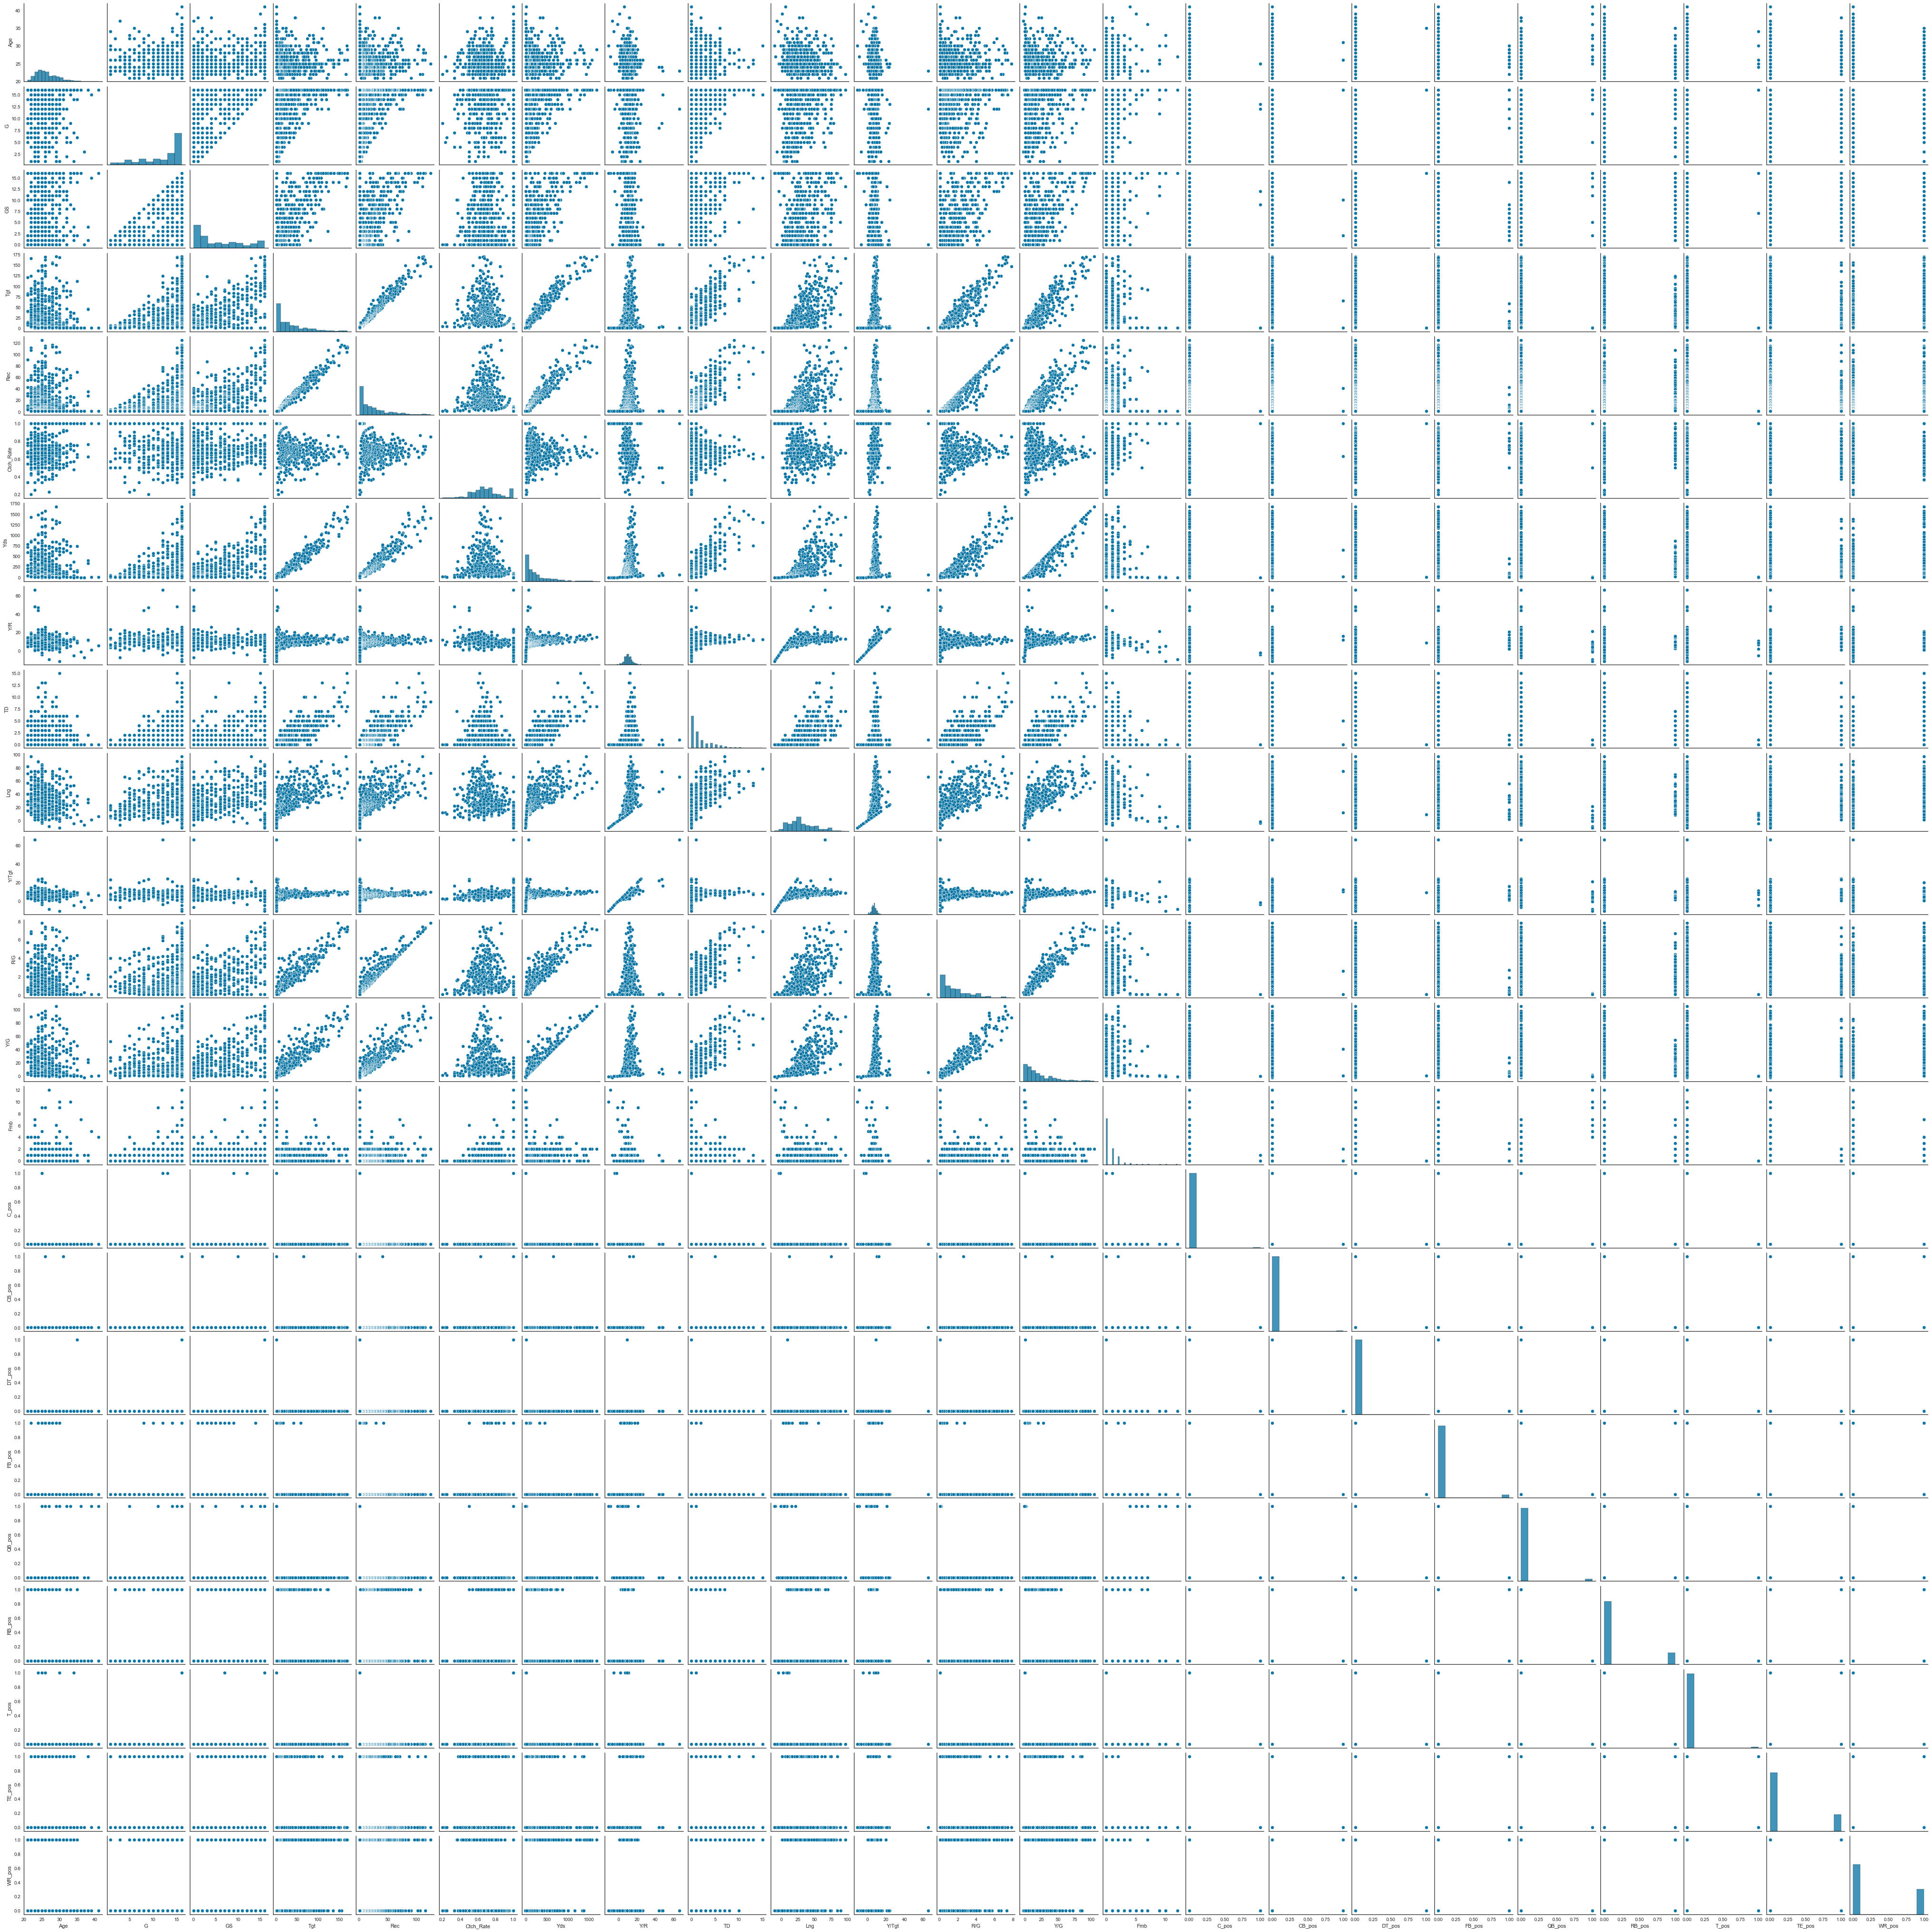

In [152]:
sns.pairplot(X)

**2)b) Fit a k-means model with the data from 2)a). For us to fit this model we must first determine an optimal k. Use a an elbow graph to plot a comprehensive range of k's and fit your model to the chosen k.** [ 4 pts]


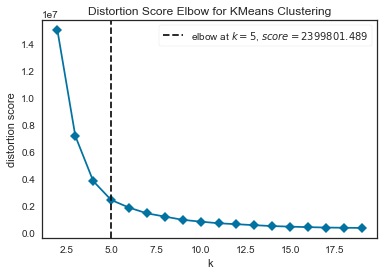

In [148]:
# Your code here
#Create a Kmeans model
model = KMeans(random_state=1)
#run from k=2 to k=20
visualizer = KElbowVisualizer(model, k=(2,20), timings = False)
visualizer.fit(X)
visualizer.show();

In [150]:
model_elbow = KMeans(random_state=1, n_clusters=5).fit(X)

**2)c) Repeat 2)a) using the Calinski-Harabasz metric. Did your k change or remain the same?** [ 4 pts]

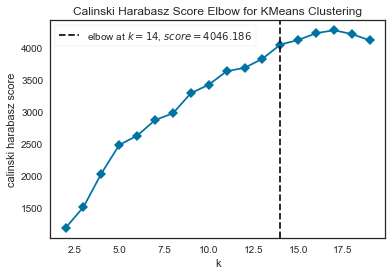

In [149]:
# Your code here
visualizer = KElbowVisualizer(model, k=(2,20), metric='calinski_harabasz',timings=False)
visualizer.fit(X)
visualizer.show();

In [151]:
model_calinski = KMeans(random_state=1, n_clusters=14).fit(X)

--> Your answer here

**2)d) Examine your results from 2)a) and 2)c). How good are the clusters formed by each? What makes sense and what doesn't make sense?** [ 4 pts]

In [ ]:
# Your code here

--> Your answer here

**2)e) Go to yellowbrick [Feature Analysis Visualizers](https://www.scikit-yb.org/en/latest/api/features/index.html) and read through the categories. Creates a correlation plot with yellowbrick. Pick an additional plot and use it on your features. What did you learn from both plots?**[4pts]

In [ ]:
#your code here
#add as many cells as you want


--> Your answer here

---

### Question 3 - Market Basket Analysis [ 12 pts]


**3)a) Begin by loading and cleaning the bread basket dataset.** [2 pts]

In [ ]:
#Your code here

**3)b) From the dataset extract the transactions, and print out a single random transaction.** [ 2 pts]

In [ ]:
# your code here

**3)c) Use the Transaction encoder on your transactions dataset. Print out your encoded transactions** [2 pts]

In [ ]:
#your code here

**3)d) Use the apriori algorithm and generate association rules to extract the most frequent itemsets.** [ 2 pts]

In [ ]:
#your code here

--> Your answer here

**3)e) Play around with the generating association rules according to different thresholds. Comment on the levels of support, lift, and confidence of this dataset. What are the levels of your most popular itemsets? What are good thresholds?** [ 4 pts]

In [ ]:
#your code here


--> Your answer here

---

### REFERENCES
List any references (even if these are previous homeworks, office hours, class exercises, websites, etc) you used to complete your homework. Even if they are one of the books assigned for this class. If this section is incomplete you will be deducted 50% of your final grade from this homework.

1. Plot trees for a Random Forest in Python with Scikit-Learn https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn
2. GridsearchCV with RandomForest https://stackoverflow.com/questions/45403482/gridsearchcv-with-randomforest
3.  Yellowbrick https://www.scikit-yb.org/en/latest/api/datasets/nfl.html



**Note: if there are no comments to explain your code you will receive 0 in this homework**

### Total Score:  --/50

### END OF HOMEWORK 3